In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from Qommunity.samplers.hierarchical.advantage_sampler import AdvantageSampler
from Qommunity.searchers.hierarchical_searcher import HierarchicalSearcher
from Qommunity.iterative_searcher import IterativeSearcher

from dataclasses import dataclass, fields

In [3]:
G = nx.powerlaw_cluster_graph(n=100, m=1, p=0.1)
num_reads = 100
version = ""
region = "na-west-1"

In [4]:
advantage = AdvantageSampler(
    G,
    num_reads=num_reads,
    version=version,
    region=region,
    use_clique_embedding=True,
    elapse_times=True,
    return_sampleset_metadata=True,
)

In [5]:
hierarchical_searcher = HierarchicalSearcher(advantage)

In [6]:
res = hierarchical_searcher.hierarchical_community_search(
    division_tree=True, return_modularities=True, return_sampleset_metadata=True
)

In [7]:
communities, division_tree, division_modularities, hierarchical_run_metadata = res

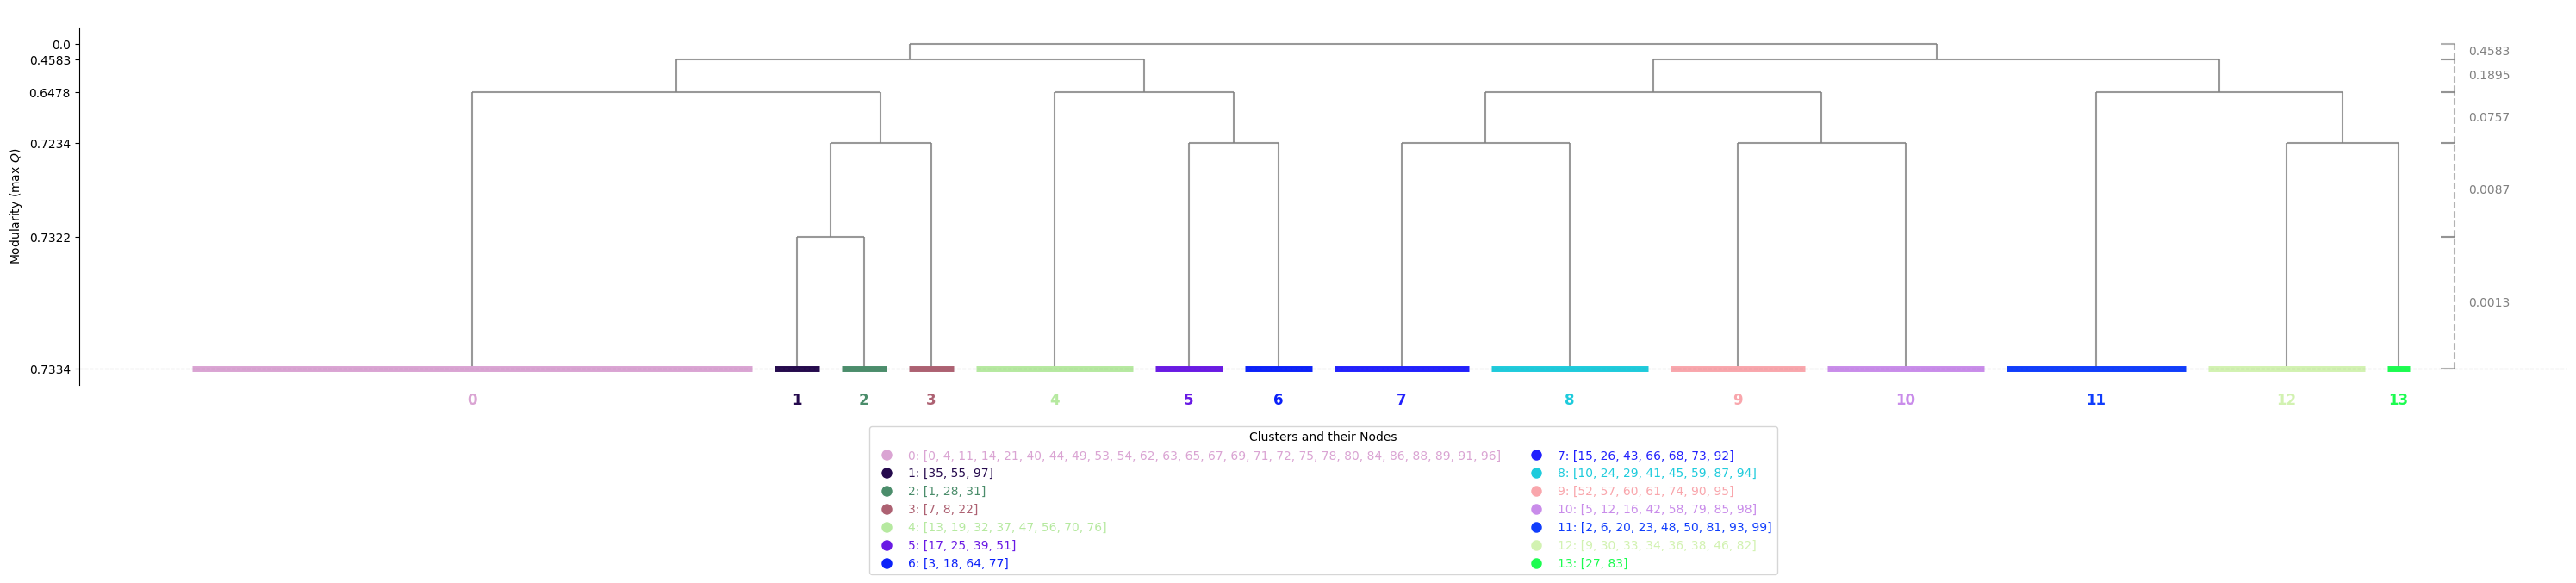

In [9]:
from dendro import Dendrogram


dendro = Dendrogram(G, communities, division_modularities, division_tree)
dendro.draw(yaxis_abs_log=True, figsize=(30, 7), display_leafs=False)

In [10]:
for sublist in division_tree:
    print(sublist)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]
[[0, 1, 3, 4, 7, 8, 11, 13, 14, 17, 18, 19, 21, 22, 25, 28, 31, 32, 35, 37, 39, 40, 44, 47, 49, 51, 53, 54, 55, 56, 62, 63, 64, 65, 67, 69, 70, 71, 72, 75, 76, 77, 78, 80, 84, 86, 88, 89, 91, 96, 97], [2, 5, 6, 9, 10, 12, 15, 16, 20, 23, 24, 26, 27, 29, 30, 33, 34, 36, 38, 41, 42, 43, 45, 46, 48, 50, 52, 57, 58, 59, 60, 61, 66, 68, 73, 74, 79, 81, 82, 83, 85, 87, 90, 92, 93, 94, 95, 98, 99]]
[[0, 1, 4, 7, 8, 11, 14, 21, 22, 28, 31, 35, 40, 44, 49, 53, 54, 55, 62, 63, 65, 67, 69, 71, 72, 75, 78, 80, 84, 86, 88, 89, 91, 96, 97], [3, 13, 17, 18, 19, 25, 32, 37, 39, 47, 51, 56, 64, 70, 76, 77], [5, 10, 1

In [11]:
hierarchical_run_metadata.time_measurements.sample_time.sum()

0.8022588000167161

In [12]:
dtype = [sampleset[0].dwave_sampleset_metadata][0].dtype.descr
dtype
dwave_sampleset_metadata = np.concatenate(
    [
        np.array([division_rec], dtype=dtype)
        for division_rec in [
            division.dwave_sampleset_metadata for division in sampleset
        ]
    ]
).view(np.recarray)

dtype = [sampleset[0].time_measurements][0].dtype.descr
time_measurements = np.concatenate(
    [
        np.array([division_rec], dtype=dtype)
        for division_rec in [division.time_measurements for division in sampleset]
    ]
).view(np.recarray)

NameError: name 'sampleset' is not defined

In [319]:
field_name = "dwave_sampleset_metadata"
field_name = "time_measurements"
dtype = [getattr(sampleset[0], field_name)][0].dtype.descr
time_measurements = np.concatenate(
    [
        np.array([division_rec], dtype=dtype)
        for division_rec in [getattr(division, field_name) for division in sampleset]
    ]
).view(np.recarray)
time_measurements

rec.array([(0.2318974, 0.0535824, 0.1210284),
           (0.2124924, 0.0343125, 0.0415059),
           (0.210112 , 0.0267016, 0.0317972),
           (0.1998521, 0.0203627, 0.0227998),
           (0.1966091, 0.0258751, 0.031893 ),
           (0.3033193, 0.04442  , 0.028029 ),
           (0.1950225, 0.0240733, 0.0240861),
           (0.1878205, 0.0222116, 0.0220063),
           (0.2040799, 0.0199847, 0.0204978),
           (0.2391415, 0.0266415, 0.0307971),
           (0.2916846, 0.0220534, 0.0389083),
           (0.2785287, 0.0203633, 0.0520551),
           (0.2709402, 0.0518183, 0.0581578),
           (0.2379238, 0.0284812, 0.0302804),
           (0.2137501, 0.0276452, 0.0248492),
           (0.2386638, 0.0236964, 0.0226327),
           (0.2528676, 0.0225306, 0.0229884),
           (0.2362584, 0.022064 , 0.020316 ),
           (0.2467314, 0.0251497, 0.0184629),
           (0.2956713, 0.0286884, 0.0225358),
           (0.2672683, 0.0396229, 0.0250647),
           (0.2995274, 0.0289262, 

In [302]:
from QHyper.solvers.base import SamplesetData


@dataclass
class HierarchicalRunMetadata:
    dwave_sampleset_metadata: np.ndarray
    time_measurements: np.ndarray

In [320]:
hierarchical_run_dwave_data

rec.array([(24068., 20., 200.1 , 39831.56, 1576.44, 15763.56, 20.58, 25., 25.),
           (13852., 20.,  97.94, 29611.56, 1558.44, 15759.56, 20.58, 50., 50.),
           (20818., 20., 167.6 , 36578.76, 1467.24, 15760.76, 20.58, 65., 65.),
           (14990., 20., 109.32, 30751.16, 1413.84, 15761.16, 20.58, 31., 31.),
           (12456., 20.,  83.98, 28217.16, 1551.84, 15761.16, 20.58,  1.,  1.),
           (12500., 20.,  84.42, 28261.16, 2038.84, 15761.16, 20.58,  1.,  1.),
           (19816., 20., 157.58, 35576.76, 1392.24, 15760.76, 20.58, 23., 23.),
           (14990., 20., 109.32, 30750.76, 1360.24, 15760.76, 20.58,  1.,  1.),
           (10628., 20.,  65.7 , 26389.56, 1066.44, 15761.56, 20.58,  1.,  1.),
           (19972., 20., 159.14, 35732.76, 3213.24, 15760.76, 20.58, 15., 15.),
           (12456., 20.,  83.98, 28216.76, 1263.24, 15760.76, 20.58,  1.,  1.),
           (17476., 20., 134.18, 33237.56, 1149.44, 15761.56, 20.58,  1.,  1.),
           (13852., 20.,  97.94, 29612.7

In [328]:
sampleset

[SamplesetData(dwave_sampleset_metadata=rec.array((24068., 20., 200.1, 39831.56, 1576.44, 15763.56, 20.58, 25., 25.),
           dtype=[('qpu_sampling_time', '<f8'), ('qpu_anneal_time_per_sample', '<f8'), ('qpu_readout_time_per_sample', '<f8'), ('qpu_access_time', '<f8'), ('qpu_access_overhead_time', '<f8'), ('qpu_programming_time', '<f8'), ('qpu_delay_time_per_sample', '<f8'), ('post_processing_overhead_time', '<f8'), ('total_post_processing_time', '<f8')]), time_measurements=rec.array((0.2318974, 0.0535824, 0.1210284),
           dtype=[('find_clique_embedding_time', '<f8'), ('fixed_embedding_composite_time', '<f8'), ('sample_time', '<f8')])),
 SamplesetData(dwave_sampleset_metadata=rec.array((13852., 20., 97.94, 29611.56, 1558.44, 15759.56, 20.58, 50., 50.),
           dtype=[('qpu_sampling_time', '<f8'), ('qpu_anneal_time_per_sample', '<f8'), ('qpu_readout_time_per_sample', '<f8'), ('qpu_access_time', '<f8'), ('qpu_access_overhead_time', '<f8'), ('qpu_programming_time', '<f8'), ('q

In [330]:
from enum import Enum
from dataclasses import dataclass, field


class FieldName(Enum):
    DwaveSamplesetMetadata = "dwave_sampleset_metadata"
    TimeMeasurements = "time_measurements"


@dataclass
class HierarchicalRunMetadata:
    dwave_sampleset_metadata: np.recarray = field(init=False)
    time_measurements: np.recarray = field(init=False)

    def __init__(self, sampleset: list[SamplesetData]):
        self.dwave_sampleset_metadata = self._process_samples(
            sampleset, FieldName.DwaveSamplesetMetadata.value
        )
        self.time_measurements = self._process_samples(
            sampleset, FieldName.TimeMeasurements.value
        )

    def _process_samples(
        self, sampleset: list[SamplesetData], field_name: FieldName
    ) -> np.recarray:
        dtype = [getattr(sampleset[0], field_name)][0].dtype.descr
        concatenated = np.concatenate(
            [
                np.array([division_rec], dtype=dtype)
                for division_rec in [
                    getattr(division, field_name) for division in sampleset
                ]
            ]
        ).view(np.recarray)
        return concatenated

In [335]:
hierarchical_sampleset_metadata = HierarchicalRunMetadata(sampleset)

In [334]:
hierarchical_sampleset_metadata.dwave_sampleset_metadata

rec.array([(24068., 20., 200.1 , 39831.56, 1576.44, 15763.56, 20.58, 25., 25.),
           (13852., 20.,  97.94, 29611.56, 1558.44, 15759.56, 20.58, 50., 50.),
           (20818., 20., 167.6 , 36578.76, 1467.24, 15760.76, 20.58, 65., 65.),
           (14990., 20., 109.32, 30751.16, 1413.84, 15761.16, 20.58, 31., 31.),
           (12456., 20.,  83.98, 28217.16, 1551.84, 15761.16, 20.58,  1.,  1.),
           (12500., 20.,  84.42, 28261.16, 2038.84, 15761.16, 20.58,  1.,  1.),
           (19816., 20., 157.58, 35576.76, 1392.24, 15760.76, 20.58, 23., 23.),
           (14990., 20., 109.32, 30750.76, 1360.24, 15760.76, 20.58,  1.,  1.),
           (10628., 20.,  65.7 , 26389.56, 1066.44, 15761.56, 20.58,  1.,  1.),
           (19972., 20., 159.14, 35732.76, 3213.24, 15760.76, 20.58, 15., 15.),
           (12456., 20.,  83.98, 28216.76, 1263.24, 15760.76, 20.58,  1.,  1.),
           (17476., 20., 134.18, 33237.56, 1149.44, 15761.56, 20.58,  1.,  1.),
           (13852., 20.,  97.94, 29612.7

In [249]:
@dataclass
class HierarchicalSearchResults:
    communities: list
    division_modularities: list
    division_tree: list
    sampleset_metadata: dict

In [ ]:
dwave_sampleset_metadata.qpu_sampling_time

array([24068., 13852., 20818., 20296., 20296., 19996.,  8254.,  8254.,
       12368., 19816., 12676., 12412., 12412., 12500., 12412., 13784.,
       20728., 12660., 17476., 12500., 12500., 20818., 14990., 17248.,
       12412., 12500.])

In [ ]:
time_measurements.find_clique_embedding_time.sum()

4.3341346999877715

In [ ]:
def process_results(sampleset):
    dtype = [sampleset[0].dwave_sampleset_metadata][0].dtype.descr
    dtype
    dwave_sampleset_metadata = np.array(
        [
            np.concatenate(
                [
                    np.array([r], dtype=dtype)
                    for r in [
                        si.dwave_sampleset_info for si in sampleset[run].samplesets_data
                    ]
                ]
            ).view(np.recarray)
            for run in range(len(sampleset))
        ],
        dtype=object,
    )

    dtype = [si.time_measurements for si in sampleset[0].samplesets_data][0].dtype.descr
    time_measurements = np.array(
        [
            np.concatenate(
                [
                    np.array([r], dtype=dtype)
                    for r in [
                        si.time_measurements for si in sampleset[run].samplesets_data
                    ]
                ]
            ).view(np.recarray)
            for run in range(len(sampleset))
        ],
        dtype=object,
    )

    results_procesed_dtypes = sampleset.dtype.descr
    results_procesed_dtypes.pop()
    results_procesed_dtypes.append(("dwave_sampleset_metadata", object))
    results_procesed_dtypes.append(("time_measurements", object))
    results_procesed_dtypes

    results_processed_componenets = [
        sampleset.communities,
        sampleset.modularity,
        sampleset.time,
        sampleset.division_tree,
        sampleset.division_modularities,
        dwave_sampleset_metadata,
        time_measurements,
    ]

    results_processed = np.rec.fromarrays(
        results_processed_componenets,
        dtype=results_procesed_dtypes,
    )

    return results_processed

In [16]:
processed = process_results(res)

AttributeError: 'list' object has no attribute 'samplesets_data'